In [1]:
import numpy as np
import ev_convert as ev
import matplotlib.pyplot as plt
from exo_dmc_custom import *
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import species
#species.SpeciesInit()
import det_prob_plot as det

c:\Users\bryce\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\fit_evolution.py:18: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\fit_model.py:27: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


problem: Could not find module 'libmultinest.dll' (or one of its dependencies). Try using the full path with constructor syntax.


c:\Users\bryce\anaconda3\Lib\site-packages\species\analysis\retrieval.py:24: UserWarning: PyMultiNest could not be imported. Perhaps because MultiNest was not build and/or found at the LD_LIBRARY_PATH (Linux) or DYLD_LIBRARY_PATH (Mac)?
  warnings.warn(


species v0.7.4
Working folder: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4
Configuration settings:
   - Database: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4\species_database.hdf5
   - Data folder: c:\Users\bryce\Python\High Contrast Imaging Project\Year_4\data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03


In [2]:
database = species.Database()
database.add_isochrones(model='atmo')
read_iso = species.ReadIsochrone(tag='atmo-ceq')
print(read_iso.get_filters())

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
['MKO_Y', 'MKO_J', 'MKO_H', 'MKO_K', 'MKO_Lp', 'MKO_Mp', 'W1', 'W2', 'W3', 'W4', 'IRAC_CH1', 'IRAC_CH2']


The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.


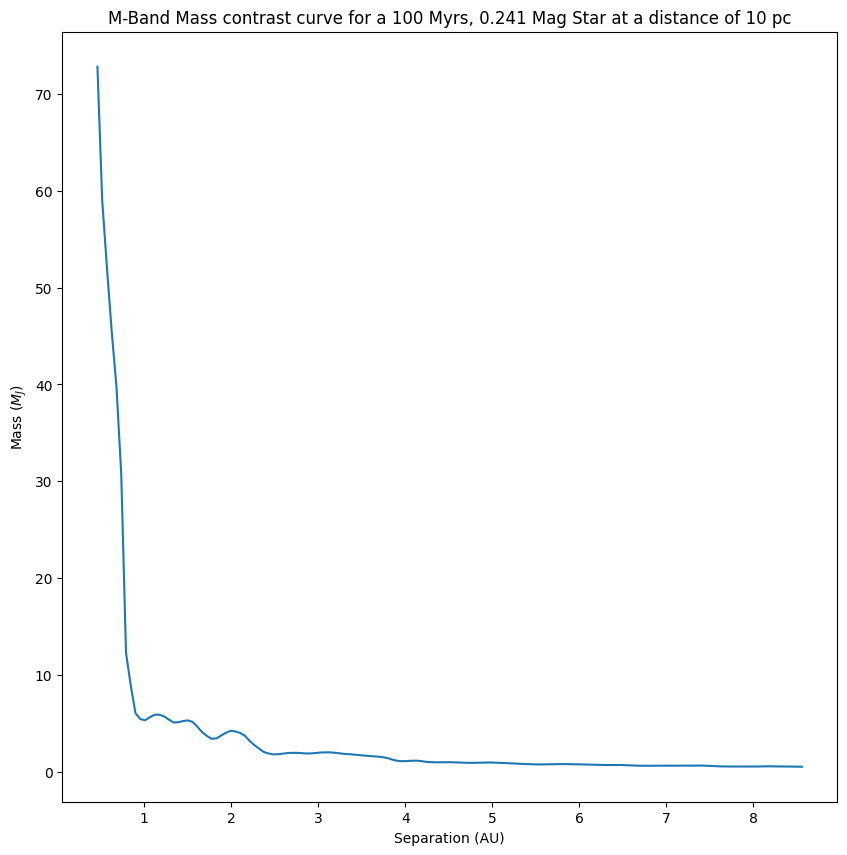

In [3]:
import astropy.io.fits as fits
data = fits.getdata('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/science_case_Dec2020/cc_adi_bckg1_mag0.241_M_CVC_fullM1_all_effects.fits', ext=0)
x = data[0,:]
y = data[1,:]
distance = 10
age = 100
stellar_mag = 0.241
filter_name = 'MKO_Mp'
band = 'M'
x = ev.arc_to_au(x, distance)
masses = read_iso.contrast_to_mass(age=age,
                                   distance=distance,
                                   filter_name=filter_name,
                                   star_mag=stellar_mag,
                                   contrast=y,
                                   use_mag=False)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(x, masses)
ax.set_ylabel('Mass ($M_J$)')
ax.set_xlabel('Separation (AU)')
ax.set_title('{}-Band Mass contrast curve for a {} Myrs, {} Mag Star at a distance of {} pc'.format(band, age, stellar_mag, distance))
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2020'
savefilename = '{}_{}mag_{}myrs_{}pc'.format(filter_name,stellar_mag,age,distance)
#plt.savefig(str(savefolder)+'/'+str(savefilename)+'_curve.png', bbox_inches='tight')

<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(c

M-Band Detection Probability a 100 Myrs, 0.241 Mag Star at 10 pc time elapsed - 00:00:01.18


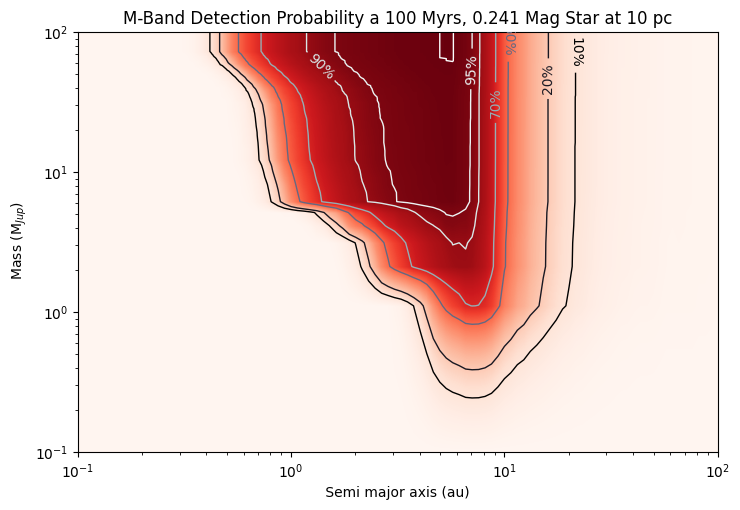

In [4]:
ID='{}-Band Detection Probability a {} Myrs, {} Mag Star at {} pc'.format(band, age, stellar_mag, distance)
dist=([10])
map=exodmc(ID, dist)
map.set_grid(x_min=0.1, x_max=100, logx=True)
xlim=x
ylim=masses
prob = map.DImode(xlim, ylim, lxunit = 'au', savefig = False)
#plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.


<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(c

M-Band Detection Probability a 100 Myrs, 0.241 Mag Star at 10 pc time elapsed - 00:00:01.16
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.


<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(c

M-Band Detection Probability a 100 Myrs, -0.648 Mag Star at 10 pc time elapsed - 00:00:01.28
The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.


<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
<__array_function__ internals>:200: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(c

L-Band Detection Probability a 100 Myrs, -0.63 Mag Star at 10 pc time elapsed - 00:00:01.40


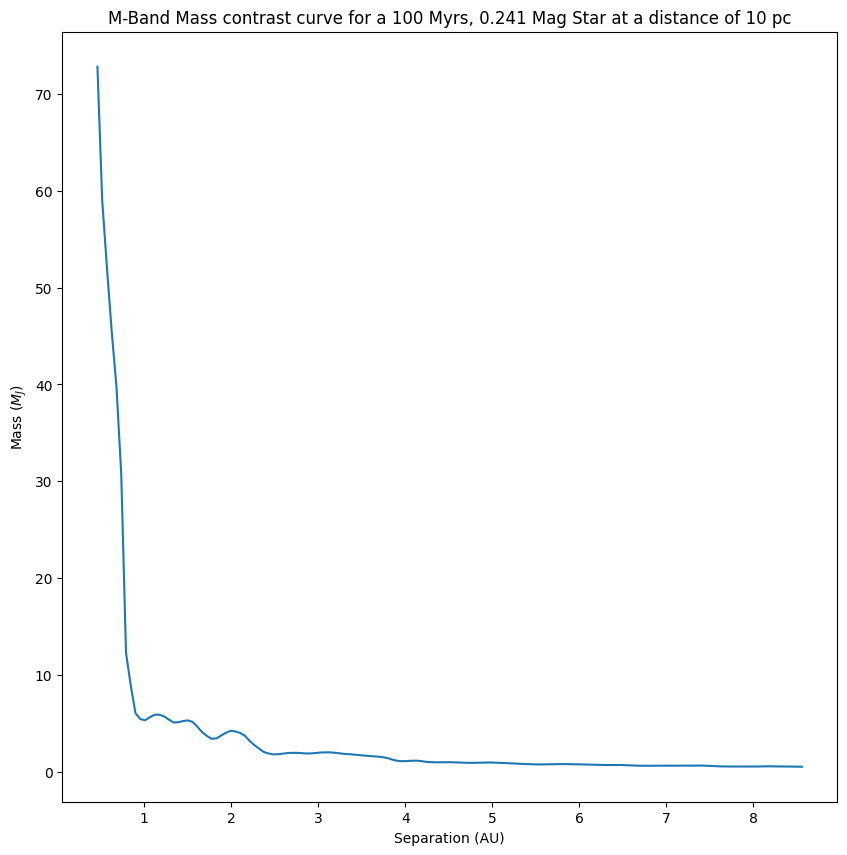

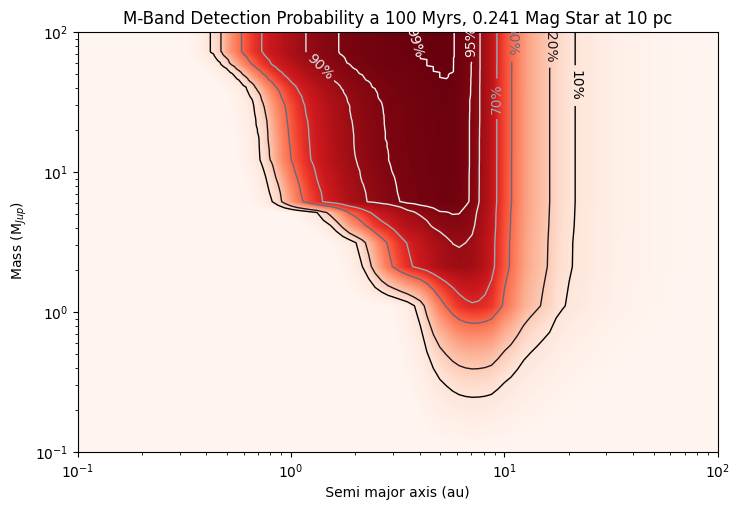

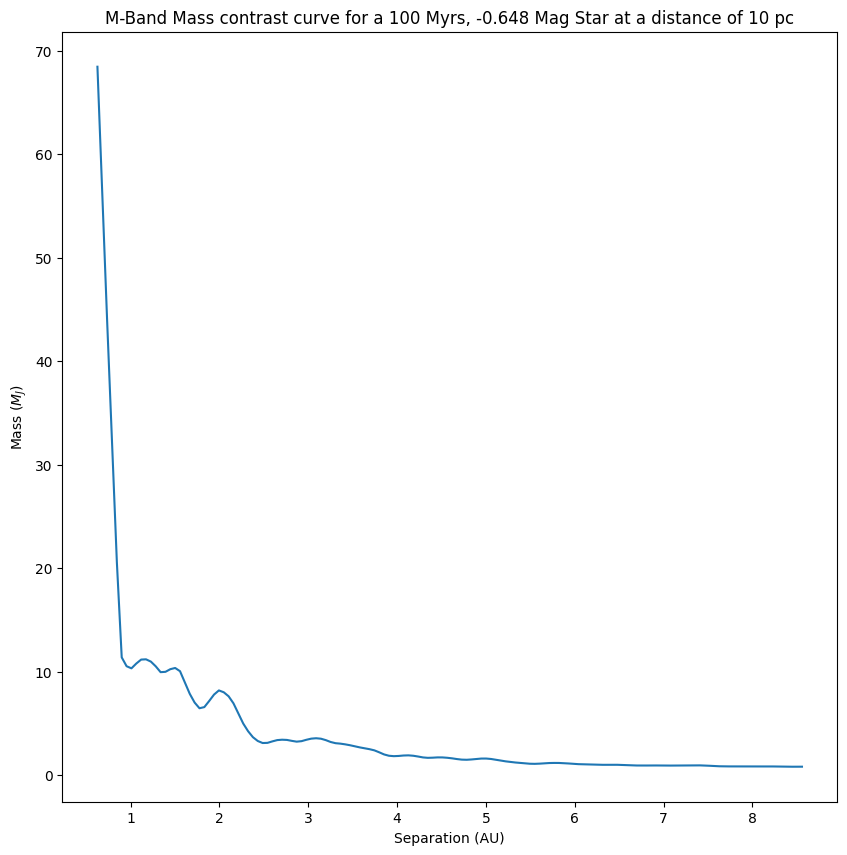

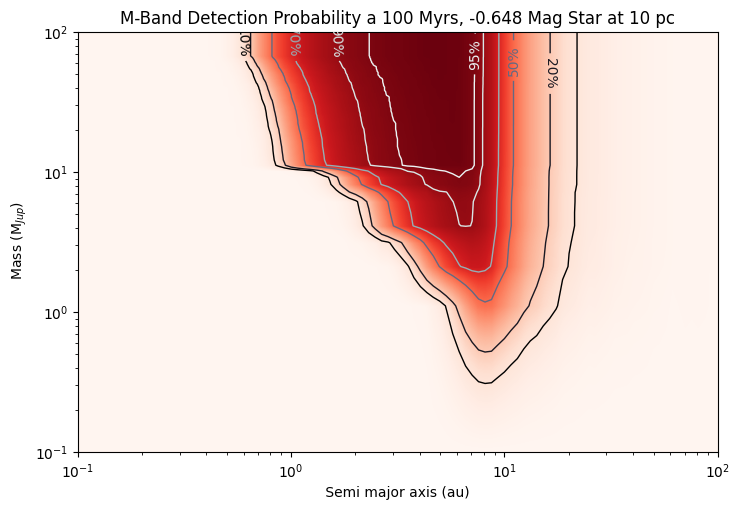

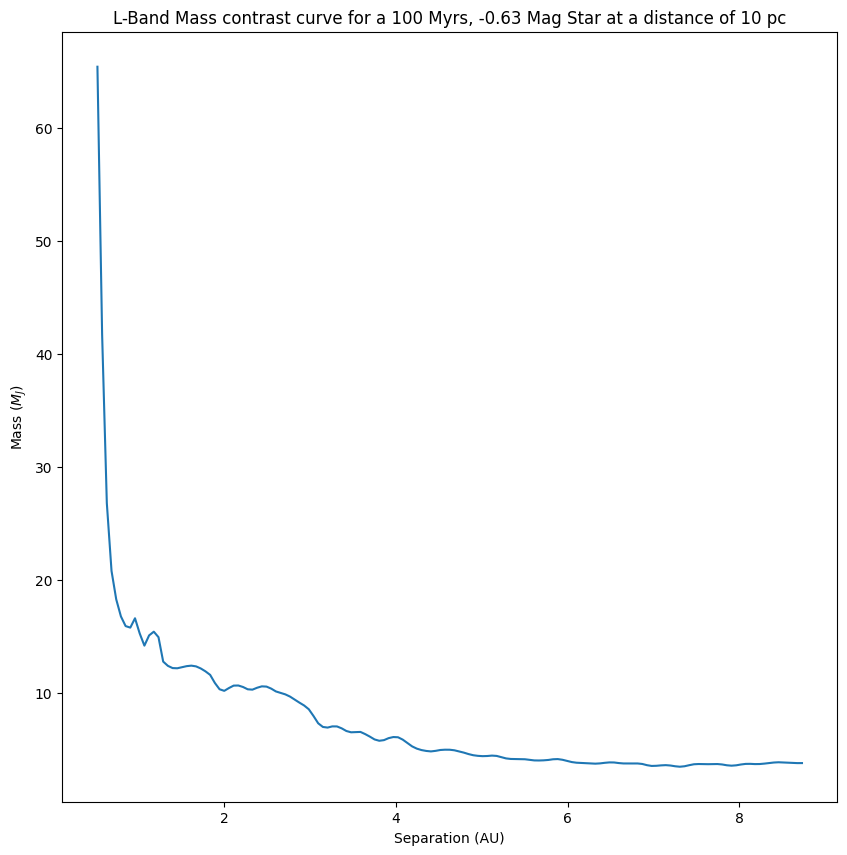

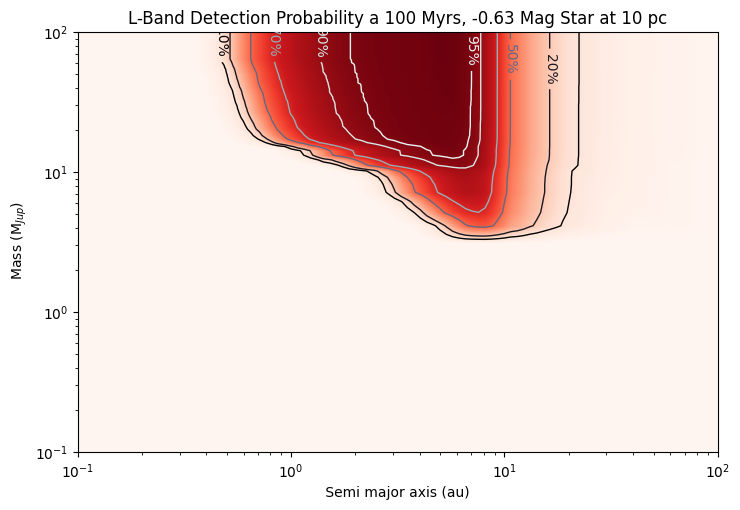

In [5]:
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/science_case_Dec2020'
file_list = ['cc_adi_bckg1_mag0.241_M_CVC_fullM1_all_effects.fits',
             'cc_adi_bckg1_mag-0.648_M_CVC_fullM1_all_effects.fits',
             'cc_adi_bckg1_mag-0.63_L_CVC_fullM1_all_effects.fits',]
stellar_mag_list = [0.241,
                    -0.648,
                    -0.63]
filter_name_list = ['MKO_Mp',
                    'MKO_Mp',
                    'MKO_Lp']
band_list = ['M',
             'M',
             'L']
savefolder = 'C:/Users/bryce/Downloads'
distance = 10
age = 100

det.plot(model, model_tag, foldername, file_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder)